In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import OrderedDict

In [2]:
data = pd.read_csv("../data/mlbam_pitch_20170427.csv").query("pit_box_name=='Tanaka'")

In [3]:
data[['inning_number', 'pit_box_name', 'bat_box_name', 'px', 'pz', 'sz_top', 'sz_bot', 'pitch_type', 'pitch_res', 'start_speed', 'pitch_des']]

,inning_number,pit_box_name,bat_box_name,px,pz,sz_top,sz_bot,pitch_type,pitch_res,start_speed,pitch_des
1165,1,Tanaka,Pedroia,0.983547,1.660159,3.616738,1.800820,FF,B,91.0,Ball
1166,1,Tanaka,Pedroia,1.149696,0.378749,3.659990,1.876568,FF,B,89.3,Ball
1167,1,Tanaka,Pedroia,0.869603,1.180127,3.659990,1.822463,FF,B,89.1,Ball
1168,1,Tanaka,Pedroia,0.100777,1.502873,3.690983,1.789016,FF,S,88.9,Called Strike
1169,1,Tanaka,Pedroia,0.000627,2.005813,3.659990,1.486971,FF,X,89.3,"In play, out(s)"
1170,1,Tanaka,Benintendi,-0.458179,0.959341,3.611112,1.817817,CU,B,74.4,Ball
1171,1,Tanaka,Benintendi,-0.474677,1.554469,3.675990,1.503971,SI,X,91.2,"In play, out(s)"
1172,1,Tanaka,Betts,0.792526,2.611092,3.605925,1.692602,CU,S,75.2,Called Strike
1173,1,Tanaka,Betts,0.743675,2.066101,3.659990,1.486971,FF,X,89.5,"In play, out(s)"
1189,2,Tanaka,"Ramirez, H",0.376398,2.224399,3.712245,1.935266,FF,S,88.9,Called Strike


In [4]:
inning = 1
batter = "Pedroia"
pitch = 1
cnt = 1

11


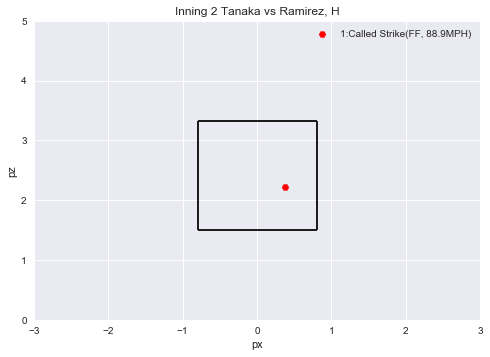

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Inning {inning} Tanaka vs {batter}".format(inning = inning, batter = batter))
ax.set_xlabel("px")
ax.set_xlim((-3.0, 3.0))
ax.set_ylabel("pz")
ax.set_ylim((0.0, 5.0))
ax.grid(True)

# Strike Zone
ax.vlines(-0.8, ymin =1.5, ymax = 3.32)
ax.vlines(0.8, ymin =1.5, ymax = 3.32)
ax.hlines(1.5, xmin = -0.8, xmax = 0.8)
ax.hlines(3.32, xmin = -0.8, xmax = 0.8)

pitch_data = []
for _, d in data.iterrows():
    if inning == d["inning_number"] and batter == d["bat_box_name"]:
        pitch_data.append(d)

for i in range(0, pitch):
    label = "{cnt}:{event}({type}, {speed}MPH)".format(
        **{
            "cnt": i + 1,
            "speed": pitch_data[i]["start_speed"],
            "type": pitch_data[i]["pitch_type"],
            "event": pitch_data[i]["pitch_des"]
        }
    )
    ax.scatter(pitch_data[i]["px"], pitch_data[i]["pz"], label = label, c = "red", marker = "H")

pitch += 1
cnt +=1

print(cnt)

if len(pitch_data) < pitch:
    pitch = 1
    i = 1
    for _, d in data.iterrows():
        if i == cnt:
            inning = d["inning_number"]
            batter = d["bat_box_name"]
            break
        i += 1

ax.legend()